In [83]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from statistics import mean, median
from scipy.stats import ranksums

In [124]:
MR = 100

data_file = ("data/{}_mr_50_cond/simulated_noNoise.txt").format(MR)

data = pd.read_csv(data_file, sep = "\t", index_col=None)

N_genes = 100  # total no. of genes
N_TFs = N_genes

In [125]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3.26,7.52,3.05,5.29,8.00,4.02,3.99,3.89,6.73,3.71,...,12.10,5.56,11.0,12.40,5.20,11.80,5.64,4.50,10.20,4.26
1,7.72,9.75,3.25,3.18,4.19,6.19,4.68,2.57,6.26,4.79,...,11.80,6.83,12.0,8.07,4.25,10.00,7.67,4.33,13.70,3.43
2,1.31,4.23,2.43,3.72,5.78,2.55,6.59,1.76,9.21,4.24,...,9.42,7.75,12.6,10.60,4.91,7.89,7.23,3.67,9.49,4.14
3,6.87,5.70,2.42,3.76,4.91,6.83,3.98,2.37,3.81,3.33,...,9.48,4.67,13.7,8.86,6.04,10.60,4.09,5.83,12.50,3.98
4,2.33,5.48,2.56,3.06,2.11,5.91,5.34,3.62,5.14,1.55,...,5.69,9.29,11.9,10.80,6.06,10.40,5.58,2.64,15.50,5.74


In [126]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values.unique()

array([0])

In [127]:
# check summary statistics by row
data.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,7.015935,7.416700,7.086440,7.040465,6.867910,6.928700,7.159050,6.723645,6.912460,7.274650,...,6.343145,7.027395,6.856245,7.107735,7.054650,6.971655,7.196770,7.108650,6.893305,6.81892
std,3.802744,3.399558,3.633512,3.492204,3.557798,3.574665,3.649552,3.517411,3.803223,3.607611,...,3.529841,3.881154,3.802053,3.667961,3.684518,3.516556,3.574552,3.762383,3.749906,3.59120
min,0.823000,1.310000,0.816000,0.463000,0.412000,1.100000,1.610000,0.809000,0.289000,1.240000,...,0.000000,0.000000,0.437000,0.589000,0.990000,0.445000,0.364000,1.600000,0.578000,0.85400
25%,4.380000,4.730000,4.522500,4.615000,4.285000,4.207500,4.395000,4.060000,4.285000,4.725000,...,3.995000,4.432500,3.847500,4.492500,4.512500,4.317500,4.580000,4.350000,4.147500,4.18250
50%,6.295000,7.000000,6.645000,6.220000,6.205000,6.240000,6.380000,6.615000,6.200000,6.390000,...,5.395000,6.475000,6.150000,6.660000,6.445000,6.460000,6.805000,6.685000,6.160000,6.09500
75%,8.602500,9.760000,9.432500,8.877500,9.310000,9.087500,9.110000,8.497500,9.345000,9.700000,...,8.215000,8.802500,8.850000,9.407500,9.070000,9.140000,9.145000,9.307500,8.807500,8.74500
max,21.300000,20.200000,22.500000,18.000000,18.000000,17.200000,18.300000,20.300000,20.700000,22.300000,...,17.400000,23.300000,20.600000,17.600000,21.000000,17.900000,22.000000,20.700000,21.500000,20.00000


In [128]:
##data_l = data.div(data.sum(axis=1), axis=0)

##data_l.T.describe()

In [129]:
# check summary statistics by column
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,...,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.931420,7.055700,2.85260,3.709720,6.020500,4.993100,4.849530,3.658200,4.799270,3.32991,...,10.70420,6.427600,12.33240,10.542100,5.920400,9.360200,5.848200,4.853800,12.786700,3.866550
std,2.215557,2.373736,1.03066,1.502052,2.312013,1.744695,2.062548,1.628246,2.211599,1.43122,...,2.37029,1.510889,2.58112,1.884313,1.783787,2.073508,1.576189,1.367521,2.299262,1.304369
min,0.332000,2.580000,1.10000,0.445000,1.680000,1.150000,0.628000,1.020000,0.611000,0.32300,...,5.66000,2.160000,6.04000,7.080000,0.850000,5.390000,2.080000,1.990000,6.900000,0.525000
25%,3.367500,5.392500,2.04500,2.707500,4.222500,4.005000,3.482500,2.460000,3.127500,2.37500,...,8.97750,5.480000,10.45000,9.212500,4.827500,7.497500,4.602500,3.910000,10.875000,3.112500
50%,4.820000,6.985000,2.69500,3.645000,6.015000,5.110000,4.590000,3.555000,4.715000,3.24500,...,10.60000,6.565000,12.20000,10.400000,5.955000,9.350000,5.815000,4.860000,12.550000,3.890000
75%,6.780000,8.792500,3.71750,4.545000,7.375000,6.182500,6.462500,4.685000,6.347500,4.41250,...,12.15000,7.392500,13.92500,12.050000,6.865000,11.000000,7.012500,5.822500,14.525000,4.710000
max,9.620000,13.800000,5.42000,7.580000,12.500000,9.290000,10.600000,9.280000,11.400000,6.14000,...,16.50000,11.300000,21.10000,15.500000,11.700000,14.200000,10.100000,9.010000,17.700000,7.040000


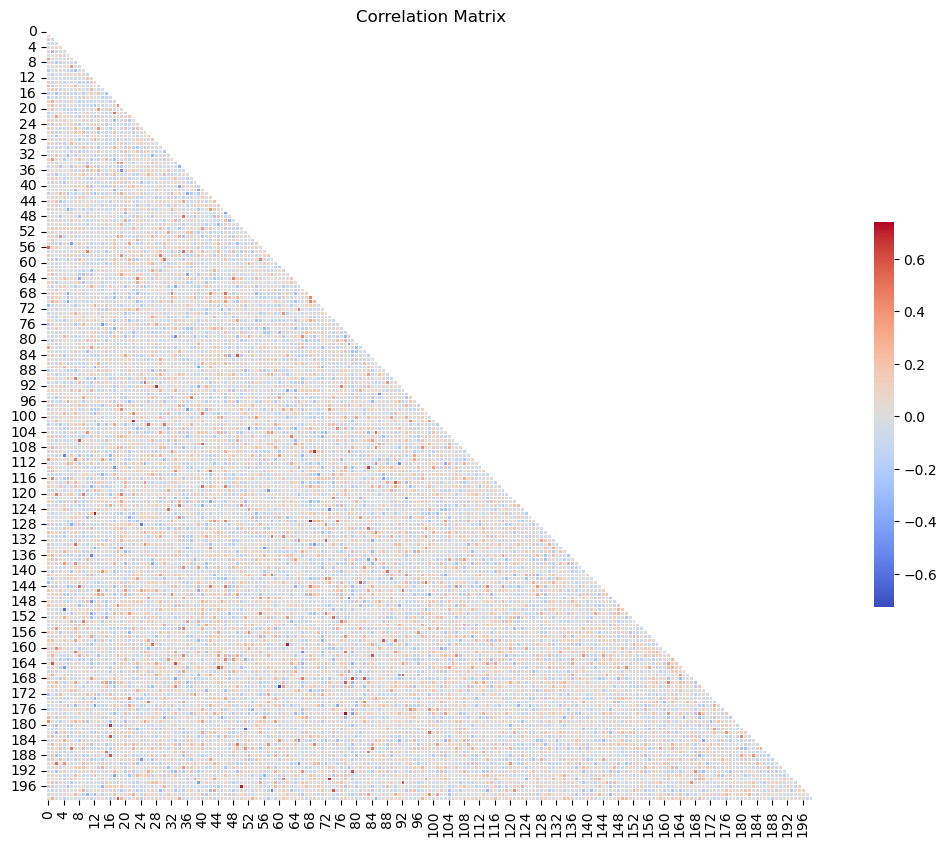

In [130]:
corr_mat = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Visualize correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=False, cmap='coolwarm', linewidths=.5, square=True,
            mask = mask, cbar_kws={"drawedges": False, "shrink": .5})
plt.title('Correlation Matrix')
plt.show()

In [131]:
# unit-variance normalization per-gene, i.e., the expression data across all conditions will have variance=1
data_n = pd.DataFrame(StandardScaler(with_mean=False).fit_transform(data.to_numpy()))

# check summary statistics by colum
data_n.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.237029,2.987377,2.781685,2.482211,2.617126,2.876293,2.363077,2.258030,2.180978,2.338345,...,4.538738,4.275615,4.801997,5.622849,3.335726,4.536927,3.729033,3.567222,5.589235,2.979241
std,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,...,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038,1.005038
min,0.150604,1.092370,1.072654,0.297754,0.730300,0.662462,0.306012,0.629597,0.277663,0.226819,...,2.399923,1.436824,2.351859,3.776266,0.478915,2.612555,1.326287,1.462518,3.016081,0.404521
25%,1.527591,2.283180,1.994162,1.811615,1.835531,2.307094,1.696951,1.518439,1.421259,1.667784,...,3.806592,3.645275,4.069027,4.913679,2.719955,3.634069,2.934728,2.873592,4.753606,2.398233
50%,2.186485,2.957443,2.628003,2.438906,2.614735,2.943634,2.236614,2.194330,2.142682,2.278719,...,4.494556,4.367013,4.750443,5.547057,3.355221,4.531983,3.707864,3.571779,5.485771,2.997309
75%,3.075596,3.722736,3.625083,3.041105,3.205931,3.561451,3.149045,2.891824,2.884555,3.098567,...,5.151778,4.917463,5.422125,6.427119,3.867942,5.331744,4.471435,4.279153,6.349069,3.629133
max,4.363898,5.842907,5.285259,5.071854,5.433781,5.351538,5.165164,5.728095,5.180610,4.311660,...,6.996242,7.516718,8.215930,8.267248,6.592122,6.882797,6.440142,6.621754,7.736904,5.424437


In [132]:
grn_file = ("data/{}_mr_50_cond/bipartite_GRN.csv").format(MR)

grn_df = pd.read_csv(grn_file, sep = ",", header = None, names=['TF_ID', 'G_ID'])
grn_df['class'] = 1

corr_mat = data_n.corr(method="pearson").abs().iloc[N_genes:,:N_TFs]
grn_pred = pd.melt(corr_mat.reset_index(), id_vars = 'index', var_name='TF_ID', value_name='corr').rename(columns={'index': 'G_ID'})

grn_eval = pd.merge(grn_pred, grn_df, on=['G_ID', 'TF_ID'], how="left")
grn_eval['class'] = grn_eval['class'].fillna(int(0))

grn_eval.to_csv("results/{}_mr_50_cond/grn_eval_baseline.csv".format(MR))

In [133]:
precision, recall, thresholds_prc = precision_recall_curve(grn_eval['class'], grn_eval['corr'])
fpr, tpr, thresholds_roc = roc_curve(grn_eval['class'], grn_eval['corr'])
# Use AUC function to calculate the area under the curve of precision recall curve
print(auc(recall, precision))
print(auc(fpr,tpr))

roc_gene = [] 
for i in range(100):
    grn_eval_gene = grn_eval.iloc[i::N_TFs,:]
    roc_gene.append(metrics.roc_auc_score(grn_eval_gene['class'], grn_eval_gene['corr']))
    
print(mean(roc_gene))

0.6587304621389592
0.9078733931801096
0.916339278444858


In [134]:
prc = pd.DataFrame({'precision': precision, 'recall': recall}, columns=['precision', 'recall'])
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr}, columns=['fpr', 'tpr'])
prc.to_csv("results/{}_mr_50_cond/grn_prc_baseline.csv".format(MR))
roc.to_csv("results/{}_mr_50_cond/grn_roc_baseline.csv".format(MR))

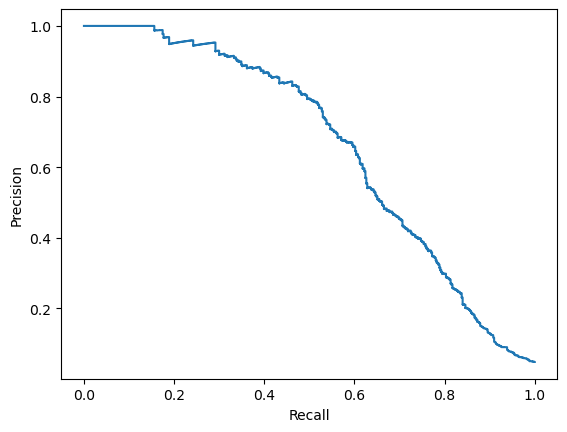

In [135]:
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


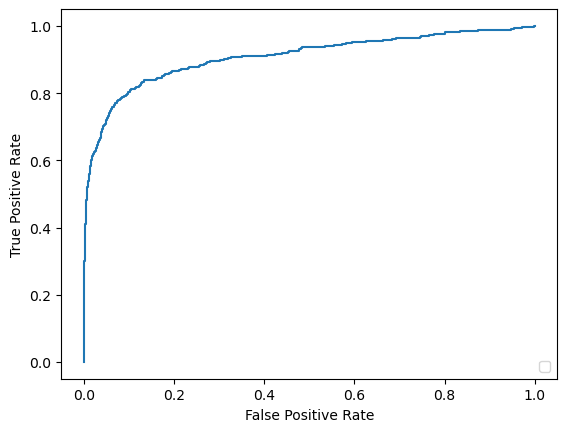

In [136]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [111]:
genie_file = ("data/{}_mr_50_cond/roc.csv").format(MR)
with open(genie_file, 'r') as f:
    lines = f.readlines()
    
roc_genie =[float(e.strip()) for e in lines]

print(mean(roc_genie))

0.661429878034267
